In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [92]:
accounts_receivable = 3827.29

risk_free_annual_rate = 0.055
risk_free_monthly_rate =  (1 + risk_free_annual_rate) ** (1 / 12) - 1

marcus_monthly_rate = 0.02
marcus_annual_rate = (1 + marcus_monthly_rate) ** 12 -1

print("APYs")
print(marcus_annual_rate, risk_free_annual_rate)
print("MPYs")
print(marcus_monthly_rate, risk_free_monthly_rate)

APYs
0.2682417945625455 0.055
MPYs
0.02 0.004471698917043021


In [93]:
"""
Solve for the number of compounding periods such that marcus_annual_rate == risk_free_annual_rate (i.e., the equilibrium / no abritrage rate).
In otherwords, solve for n such that an investor is indifferent between a treasury bill allocation vs. Marcus fund allocation.

1) (1 + marcus_monthly_rate) ** n = (1 + risk_free_annual_rate)
2) ln((1 + marcus_monthly_rate) ** n)) = ln(1 + risk_free_annual_rate)
3) n * ln(1 + marcus_monthly_rate) = ln(1 + risk_free_annual_rate)
n = ln(1 + risk_free_annual_rate) / ln(1 + marcus_monthly_rate)
"""

n = np.log(1 + risk_free_annual_rate) / np.log(1 + marcus_monthly_rate)

print(f"Equilibirum, no arbitrage number of compounding periods = {n}")
print(f"No arbitrage time-to-maturity (i.e., maximum time before repayment) = {12 / n}")

Equilibirum, no arbitrage number of compounding periods = 2.7037203764552347
No arbitrage time-to-maturity (i.e., maximum time before repayment) = 4.438328794833745


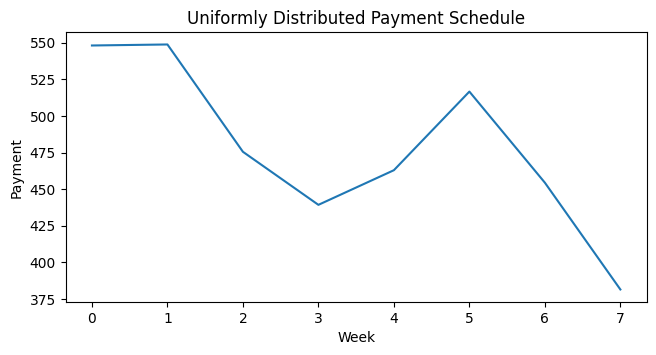

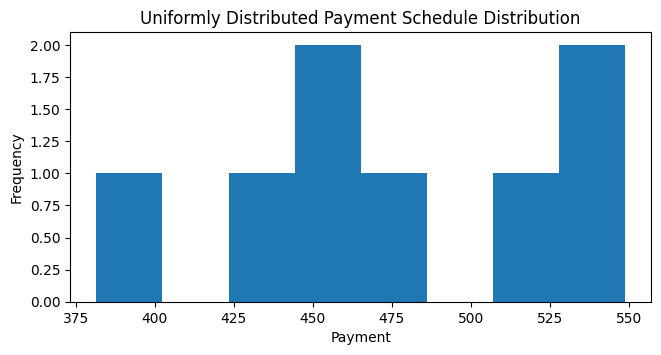

array([548.09327552, 548.78569192, 475.52495786, 439.31584174,
       462.96149839, 516.61812755, 454.44538192, 381.54522509])

In [100]:
"""
Generate a uniformly distributed payment schedule simulation conditional on the number of payment periods and total obligation.
This methodology faciliates stochasticity in payment schedules to avoid fraudulent actiity alerts. 
"""

# Covnert no arbitrage time-to-maturity from months to weeks
n_payments = int(12 / n) * 2

# Run Pareto Monte Carlo Simulation
simulation = np.random.uniform(low=0.25, high=0.6, size=n_payments)

# Rescale simulation s.t. each element is a proportion 
proportional_simulation = simulation / np.sum(simulation)

# Scale each proportion by total obligation to transform simulation into payment schedule
simulated_payment_schedule = proportional_simulation * accounts_receivable

# Plot schedule
plt.figure(figsize=(7.5, 3.5))
plt.title("Uniformly Distributed Payment Schedule")
plt.plot(simulated_payment_schedule)
plt.xlabel("Week")
plt.ylabel("Payment")
plt.show()

# Plot distributional shape
plt.figure(figsize=(7.5, 3.5))
plt.title("Uniformly Distributed Payment Schedule Distribution")
plt.hist(simulated_payment_schedule, bins=n_payments)
plt.xlabel("Payment")
plt.ylabel("Frequency")
plt.show()

simulated_payment_schedule

In [107]:
pd.Series([548.09327552, 548.78569192, 475.52495786, 439.31584174,
       462.96149839, 516.61812755, 454.44538192, 381.54522509]).to_clipboard()

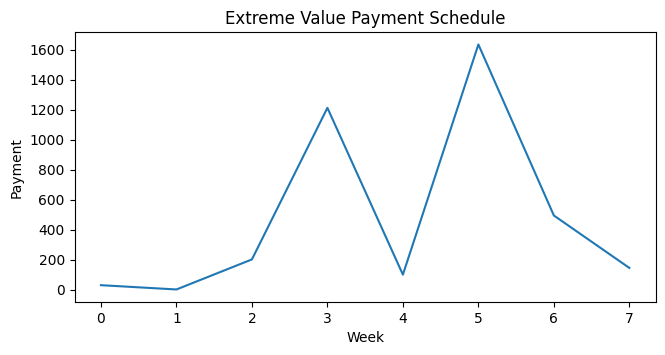

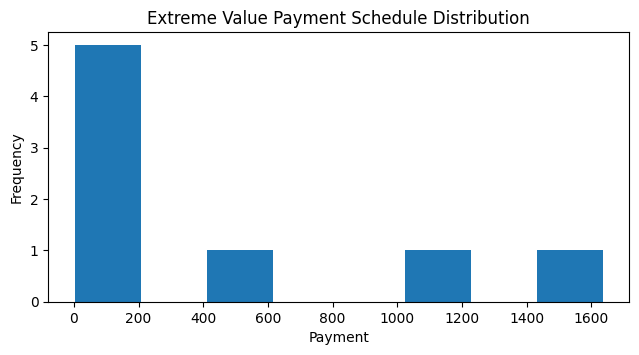

array([  30.87492427,    2.24807735,  202.66504193, 1213.33804501,
        101.08105333, 1635.72142377,  495.43870772,  145.92272663])

In [106]:
"""
Generate a Pareto distributed skewed payment schedule simulation conditional on the number of payment periods and total obligation.
This methodology more closely resembles real-life expense distributions and masks fraudulent activity more efficiently. 
"""


# Covnert no arbitrage time-to-maturity from months to weeks
n_payments = int(12 / n) * 2

# Run Pareto Monte Carlo Simulation
simulation = np.random.pareto(a=5, size=n_payments)

# Rescale simulation s.t. each element is a proportion 
proportional_simulation = simulation / np.sum(simulation)

# Scale each proportion by total obligation to transform simulation into payment schedule
simulated_payment_schedule = proportional_simulation * accounts_receivable

# Plot schedule
plt.figure(figsize=(7.5, 3.5))
plt.title("Extreme Value Payment Schedule")
plt.plot(simulated_payment_schedule)
plt.xlabel("Week")
plt.ylabel("Payment")
plt.show()

# Plot distributional shape
plt.figure(figsize=(7.5, 3.5))
plt.title("Extreme Value Payment Schedule Distribution")
plt.hist(simulated_payment_schedule, bins=n_payments)
plt.xlabel("Payment")
plt.ylabel("Frequency")
plt.show()

simulated_payment_schedule

In [7]:
np.min(simulated_payment_schedule)

15.589125089206014

In [8]:
accounts_receivable/n_payments

292.15